# What happens if chess players make random moves?
### By Rokuto and Tom

This notebook was made in one morning by Rokuto and Tom for fun in late March, 2020. In it, we simulate 10,000 chess games with random moves taken by both players. We wanted to know whether such games ever end and, if so, after how many moves?

According to an online database of 946,503 chess games, the average number of moves in a game played by humans is about 41 (https://www.chessgames.com/chessstats.html).

In [18]:
import chess
import random
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 200
plt.rcParams['figure.facecolor'] = 'w'

In [2]:
number_of_games_to_test = 10_000
max_allowable_moves = 1_000_000
draws = 0
draws_moves = []
stalemates = 0
stalemates_moves = []
checkmates = 0
checkmates_moves = []
super_long_games = 0

In [3]:
for game in range(0,number_of_games_to_test):
    if game % 1_000 == 0:
        print("Simulating game",game)
    board = chess.Board()
    for i in range(0, max_allowable_moves):
        legal_moves = []
        for j in board.legal_moves:
            legal_moves.append(j)
        len_legal_moves = len(legal_moves)
        if len_legal_moves == 0:
            #print ("Stalemate after", i+1, "moves")
            stalemates += 1
            stalemates_moves.append(i+1)
            break
        elif len_legal_moves == 1:
            random_move = chess.Move.from_uci(str(legal_moves[0]))
        else:
            random_move = chess.Move.from_uci(str(legal_moves[random.randint(0,len_legal_moves-1)]))
        #print("make move:",random_move)
        board.push(random_move)
        #print(board)
        if board.can_claim_draw():
            #print ("Draw after", i+1, "moves")
            draws += 1
            draws_moves.append(i+1)
            break
        elif board.is_checkmate():
            #print ("Checkmate after", i+1, "moves")
            checkmates += 1
            checkmates_moves.append(i+1)
            break
        elif i == max_allowable_moves:
            #print("Max allowable moves after", i+1, "moves")
            super_long_games += 1

Simulating game 0
Simulating game 1000
Simulating game 2000
Simulating game 3000
Simulating game 4000
Simulating game 5000
Simulating game 6000
Simulating game 7000
Simulating game 8000
Simulating game 9000


In [4]:
print("Number of draws", draws, "or", draws/number_of_games_to_test, "of all games")
print("Number of stalemates", stalemates, "or", stalemates/number_of_games_to_test, "of all games")
print("Number of checkmates", checkmates, "or", checkmates/number_of_games_to_test, "of all games")
print("Number of super long games", super_long_games, "or", super_long_games/number_of_games_to_test, "of all games")

Number of draws 7985 or 0.7985 of all games
Number of stalemates 552 or 0.0552 of all games
Number of checkmates 1463 or 0.1463 of all games
Number of super long games 0 or 0.0 of all games


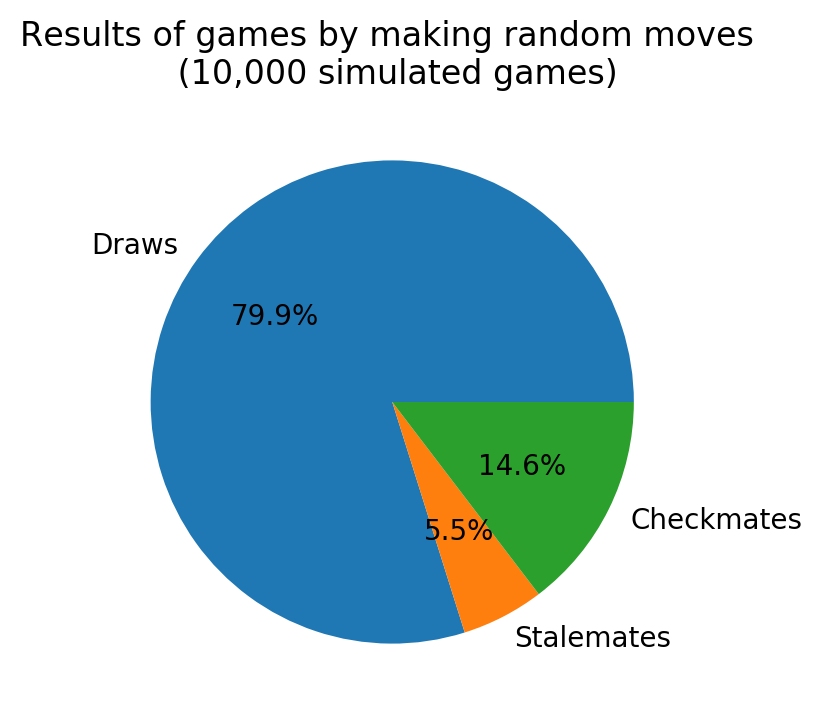

In [24]:
plt.title("Results of games by making random moves \n (10,000 simulated games)")
plt.pie([draws, stalemates, checkmates], labels=["Draws", "Stalemates", "Checkmates"], autopct='%1.1f%%')
plt.show()

In [7]:
print("Average number of moves after draw:", np.mean(draws_moves))
print("Average number of moves after stalemate:", np.mean(stalemates_moves))
print("Average number of moves after checkmate:", np.mean(checkmates_moves))

Average number of moves after draw: 416.6733876017533
Average number of moves after stalemate: 293.89130434782606
Average number of moves after checkmate: 163.4559125085441


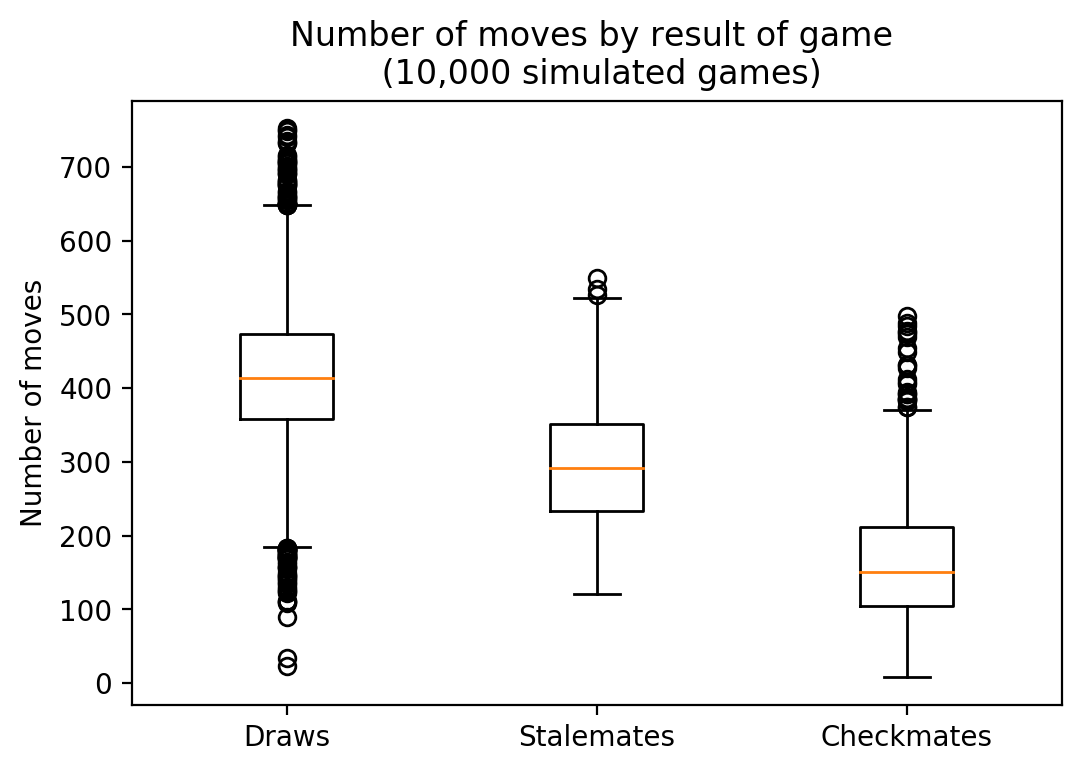

In [25]:
plt.title("Number of moves by result of game \n (10,000 simulated games)")
plt.boxplot([draws_moves, stalemates_moves, checkmates_moves], 
            labels=["Draws", "Stalemates", "Checkmates"])
plt.ylabel("Number of moves")
plt.show()